In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, BatchNormalization, Dropout


In [3]:
# Load the data
df = pd.read_csv('/Users/asaifali/Desktop/Internships/Psyliq/DATA SCIENCE - INTERNSHIP/Stock_price.csv')

In [4]:
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [5]:


# Use 'Close' prices for prediction
data = df['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for training
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, 0])
    y.append(data_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape, y_train.shape)

(495224, 10, 1) (495224,)


In [20]:
model = Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(BatchNormalization())
model.add(Dropout(0.2))  

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, epochs=2, batch_size=96)


Epoch 1/2


2023-12-08 03:39:03.207676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-08 03:39:03.208799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-08 03:39:03.209428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5159/5159 [==============================] - 220s 42ms/step - loss: 0.0343
Epoch 2/2
5159/5159 [==============================] - 230s 45ms/step - loss: 3.7214e-04


In [22]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


2023-12-08 03:46:33.750527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-08 03:46:33.751856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-08 03:46:33.752692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3869/3869 [==============================] - 16s 4ms/step - loss: 7.9119e-04
Test Loss: 0.0007911949069239199


2023-12-08 03:46:49.744520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-08 03:46:49.745679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-08 03:46:49.746466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3869/3869 [==============================] - 16s 4ms/step


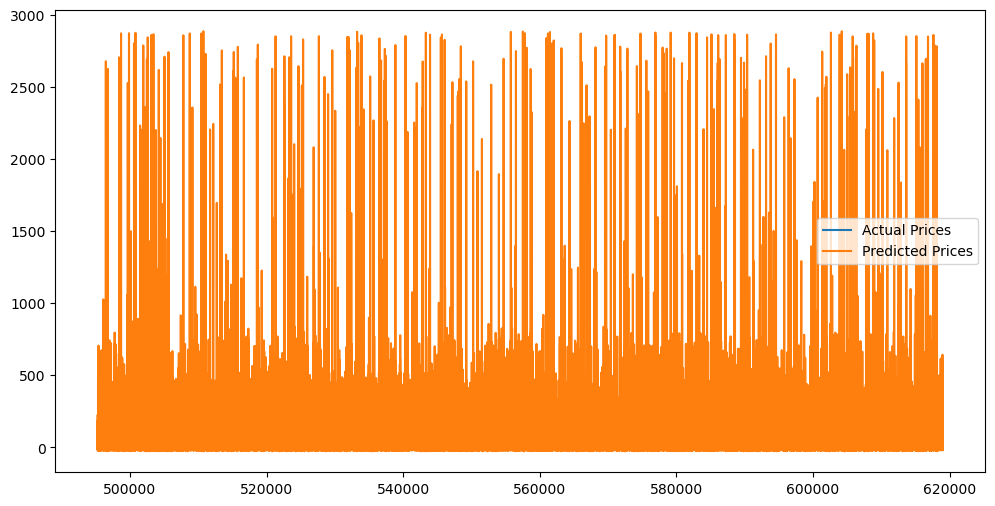

In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Optionally, you can plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Prices')
plt.legend()
plt.show()